# Домашнее задание № 1

$\text{Тарасюк Юлия, ММКТ}$ 

**I. Распределение с тяжёлыми хвостами, центральная предельная теорема, полёты Леви**

### Пункт 1
Случайная величина задана плотностью распределения $ p_{\alpha}(x) = c_\alpha (1+x)^{-\alpha}, x>0 $

Найдём нормировочный множитель $c_\alpha$ из условия $\int{p_\alpha (x)} dx =1$

$\int_{0}^{\infty}{c_\alpha (1+x)^{-\alpha}} dx = c_\alpha \int_{0}^{\infty} \dfrac{d(x+1)}{(1+x)^{\alpha}} = c_\alpha \dfrac{(1+x)^{1-\alpha}}{1-\alpha} \bigg|_0^\infty = c_\alpha \bigg [_{\infty ,\ \alpha < 1 }^{\dfrac{1}{\alpha - 1},\ \alpha>1} = 1 $

$c_\alpha = \alpha - 1$ - нормировочный множитель 

$ p_{\alpha}(x) = \dfrac{\alpha - 1}{(1+x)^{\alpha}} , x>0,\ \alpha>1  $

$\left<x\right>_\alpha = (\alpha - 1) \int_0^\infty \dfrac{x}{(1+x)^\alpha} dx = \dfrac{x(1+x)^{1-\alpha}}{1-\alpha} - \dfrac{1}{1-\alpha} \int_0^\infty {(1+x)}^{1-\alpha} dx = \dfrac{(1+x)^{1-\alpha}(1-x+\alpha x)}{2-\alpha} \bigg|_0^\infty = \dfrac{1}{\alpha - 2},\ \alpha>2 $

$\left<x^2 \right>_\alpha = (\alpha - 1) \int_0^\infty \dfrac{x^2}{(1+x)^\alpha} dx = (\alpha - 1) (\dfrac{x^2}{(1+x)^{\alpha-1}(1 - \alpha)} \bigg|_0^\infty - \dfrac{2}{1 - \alpha} \int_0^\infty \dfrac{x dx}{(1+x)^{1 - \alpha}} = 2 \ \bigg ( \dfrac{x}{(1+x)^{\alpha - 2}(2 - \alpha)} \bigg|_0^\infty  - \dfrac{1}{2 -\alpha} \int_0^\infty \dfrac{dx}{(1+x)^{2 - \alpha}} \bigg ) = \dfrac{2}{(2 - \alpha)(3 - \alpha)}$

$\sigma^2_{\alpha} = \left<x^2 \right>_\alpha - \left<x\right>_\alpha = \dfrac{2}{(2 - \alpha)(3 - \alpha)} - \dfrac{1}{(2-\alpha)^2} = \dfrac{1 - \alpha}{(2-\alpha)^2 (3 - \alpha)},  \alpha>3  $


In [51]:
from scipy.stats import betaprime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Распределение Betaprime 

Для генерации значений воспользуемся распределением betaprime из библиотеки scipy.stats

$$ f(x) = \dfrac{x^{p-1} \cdot (1+x)^{-p-q}}{B(p,q)}, x \geq 0,\ p,\ q>0$$

$$ p = 1, \alpha = 1 + q,  f(x) = \dfrac{(1+x)^{-\alpha}}{B(1, \alpha-1)}$$

$$ B(1, \alpha-1)= \dfrac{\Gamma(1)\Gamma(\alpha-1)}{\Gamma(\alpha)} = \dfrac{\Gamma(\alpha-1)}{(\alpha-1)\Gamma(\alpha-1)} = \dfrac{1}{\alpha-1}$$

$$ f(x) = \dfrac{ (1+x)^{-\alpha}}{\dfrac{1}{\alpha-1}} = \dfrac{\alpha-1}{(1+x)^{\alpha}}, x>0, \ \alpha>1 $$

При $p=1, q=\alpha-1$ распределение имеет нашу плотность 

$$ f(x) = \dfrac{\alpha-1}{(1+x)^{\alpha}}, x>0, \ \alpha>1 $$

### Пункт 2

In [134]:
def func_draw(alpha):
    """
    Функция генерирует случайные величины и строит гистограмму полученных значений
    На вход поддаётся альфа
    """
    R = betaprime.rvs(a=1, b = alpha - 1, size=2**20) # Random variates of given size
    x = np.linspace(0.01, 15, 10000) 
    """
    Обычные координаты
    """
    plt.figure(figsize=(12, 6))
    plt.plot(x, betaprime.pdf(x, a=1, b=alpha-1), label = r'Probability density function') 
    plt.hist(R, density=True, bins=30, color='darkorange', range=(0, 15), 
             label=r'Histogram of random values');
    plt.legend(loc='upper right')
    plt.title(r'Обычные координаты')
    plt.show()
    plt.clf()

    """
    Логарифмические координаты
    """
    plt.figure(figsize=(12, 6))
    x = np.linspace(0.1, 100, 1000)
    plt.loglog(x, betaprime.pdf(x, a=1, b=alpha-1),color = 'g', label=r'PDF')
    plt.hist(R, density = True, bins=20, color = 'darkorange', 
             range=(0.1, 100), label='H of RV');
    plt.legend(loc='upper right')
    plt.title(r'Логарифмические координаты')
    plt.show()
    plt.clf()

### Пункт 3

#### Функция func_draw строит график в обычных и логарифмических координатах
На вход поддаём значение $\alpha$

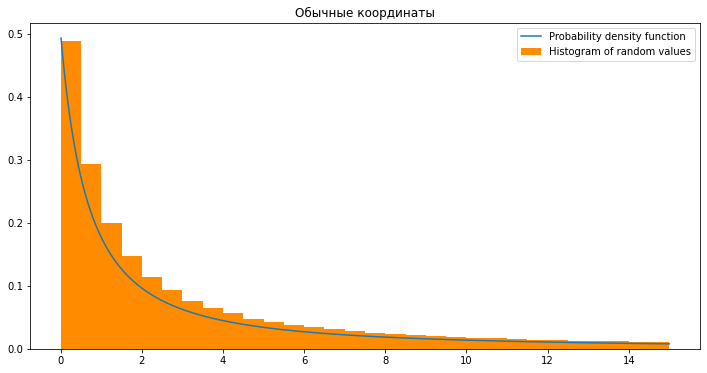

<Figure size 432x288 with 0 Axes>

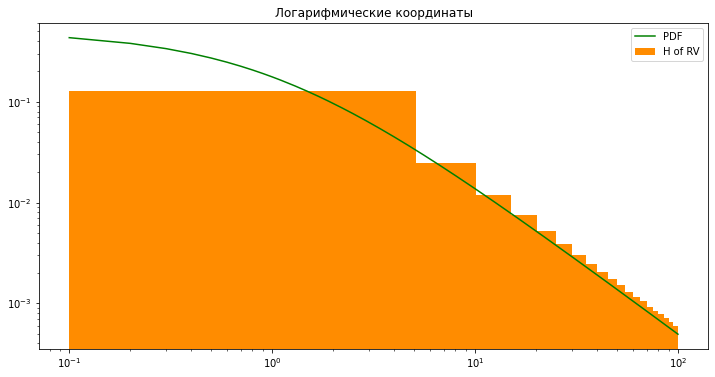

<Figure size 432x288 with 0 Axes>

In [135]:
func_draw(1.5)

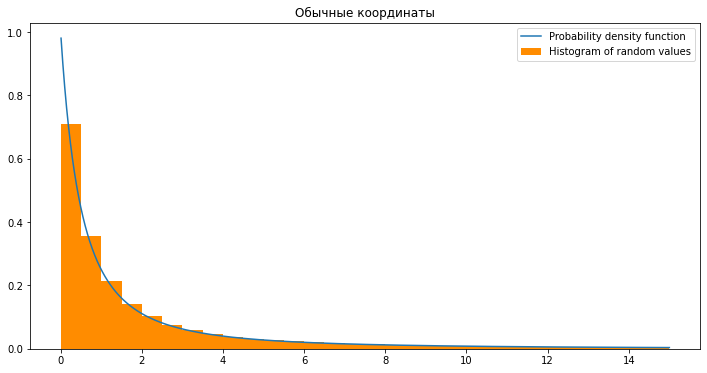

<Figure size 432x288 with 0 Axes>

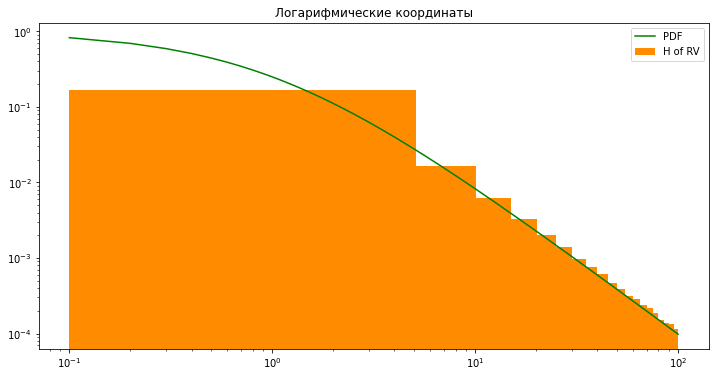

<Figure size 432x288 with 0 Axes>

In [136]:
func_draw(2)

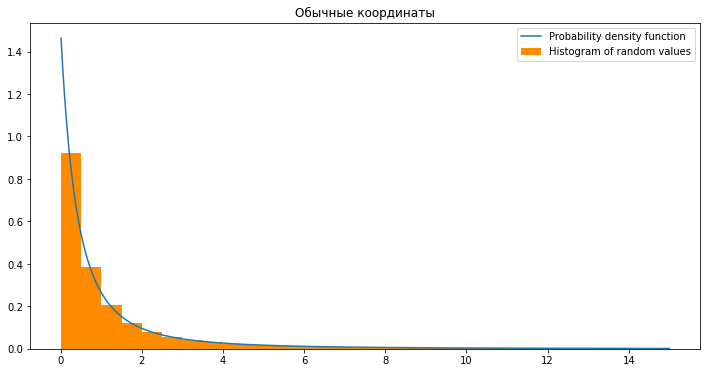

<Figure size 432x288 with 0 Axes>

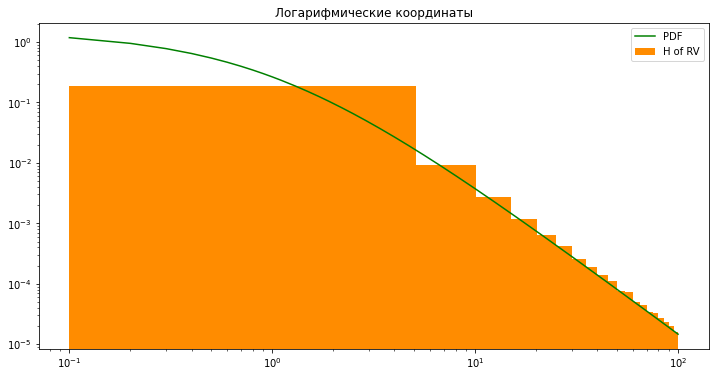

<Figure size 432x288 with 0 Axes>

In [137]:
func_draw(2.5)

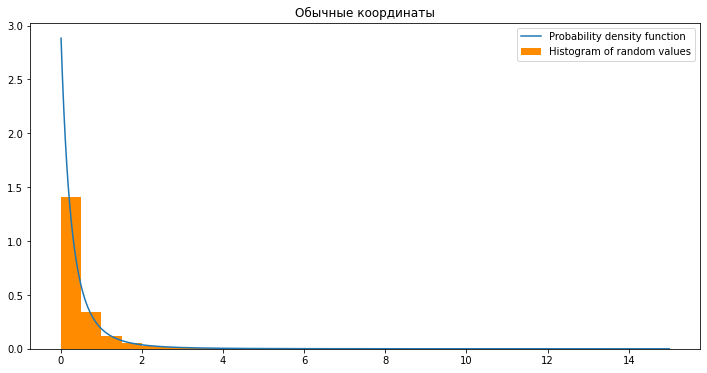

<Figure size 432x288 with 0 Axes>

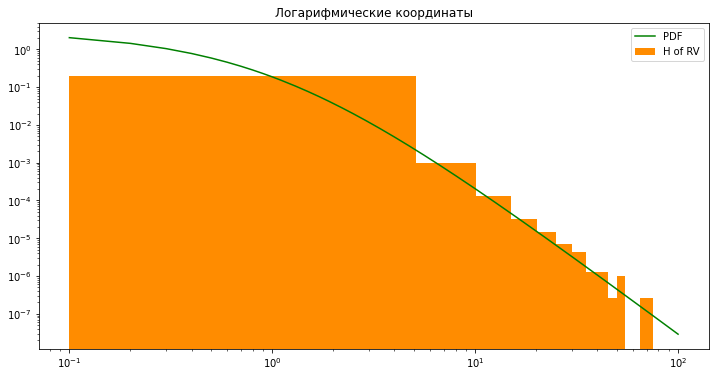

<Figure size 432x288 with 0 Axes>

In [138]:
func_draw(4)

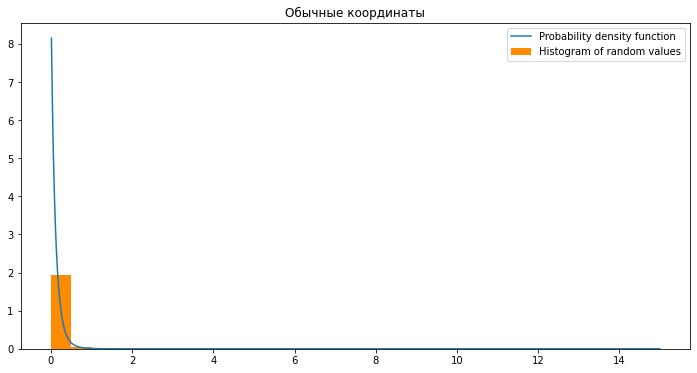

<Figure size 432x288 with 0 Axes>

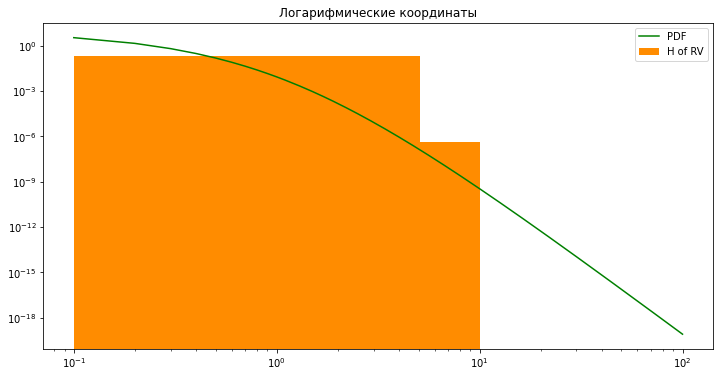

<Figure size 432x288 with 0 Axes>

In [139]:
func_draw(10)

### Пункт 4

Математическое ожидание определено при $\alpha>2$, дисперсия при $\alpha>3$.

Посчитаем математическое ожидание и дисперсию выборки при разных $N$ и $\alpha$.

#### $ \alpha = \dfrac{5}{2} $

Мат. ожидание аналитическое 2.0
             mean
1        1.498106
2        3.237845
4        1.977039
8        1.405242
18       1.863756
38       1.314679
79       1.501631
165      1.600267
342      1.933566
710      1.906668
1474     1.852190
3059     1.892029
6345     2.093212
13163    2.213795
27304    2.124792
56637    1.973151
117484   1.987996
243698   2.081192
505505   2.046653
1048576  2.016304


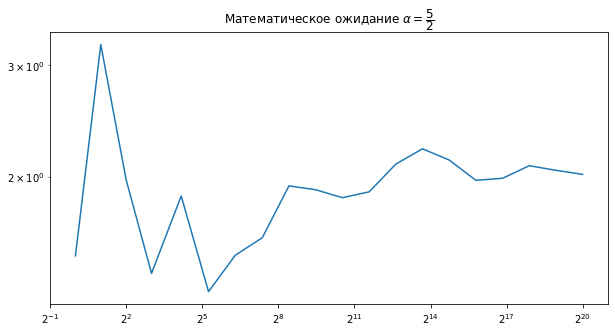

<Figure size 432x288 with 0 Axes>

In [48]:
R = betaprime.rvs(a=1, b = 1.5, size=2**20)
def calculate(alpha):
    print('Мат. ожидание аналитическое', 1/(alpha - 2))
calculate(2.5)
import pandas as pd
inds = np.logspace(start=0, stop=20, base=2, num=20, dtype=np.int) 
means = [np.mean(R[:i]) for i in inds]
df = pd.DataFrame(data=np.array([ means]).T, index = inds, columns=['mean'])
print(df)
plt.figure(figsize=(10, 5))
plt.loglog(inds, means, basex=2)
plt.title(r'Математическое ожидание $\alpha=\dfrac{5}{2}$')
plt.show()
plt.clf()

#### $\alpha = 4$

Мат. ожидание аналитическое 0.5
Дисперсия аналитическая 0.75
             mean  variance
1        0.451175  0.000000
2        1.438196  0.974210
4        0.878968  0.800072
8        0.519243  0.533685
18       0.381501  0.288372
38       0.463176  0.366883
79       0.522620  0.419089
165      0.530676  0.434364
342      0.491422  0.401184
710      0.520228  1.787592
1474     0.515107  1.445341
3059     0.509607  0.991046
6345     0.514010  0.914191
13163    0.512647  0.802239
27304    0.514020  0.931936
56637    0.505471  0.780537
117484   0.502782  0.796814
243698   0.500034  0.732370
505505   0.499523  0.724009
1048576  0.499294  0.757335


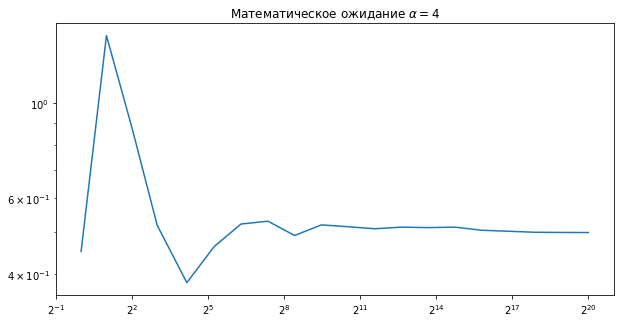

<Figure size 432x288 with 0 Axes>

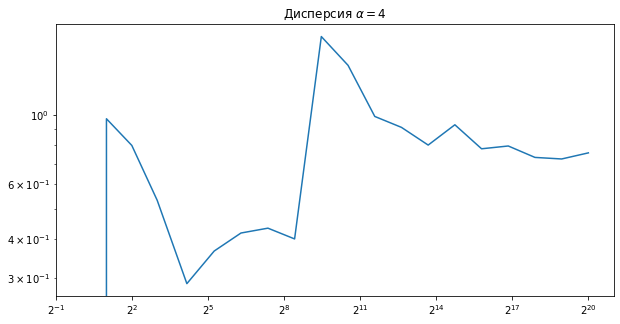

<Figure size 432x288 with 0 Axes>

In [54]:
R = betaprime.rvs(a=1, b = 3, size=2**20)
def calculate(alpha):
    print('Мат. ожидание аналитическое', 1/(alpha - 2))
    print('Дисперсия аналитическая', (1 - alpha)/((2-alpha)**2*(3-alpha)))
calculate(4)
import pandas as pd
inds = np.logspace(start=0, stop=20, base=2, num=20, dtype=np.int) 
means = [np.mean(R[:i]) for i in inds]
var = [np.var(R[:i]) for i in inds]
df = pd.DataFrame(data=np.array([ means, var]).T, index = inds, columns=['mean','variance'])
print(df)
#print('Математические ожидания',*means, 'Дисперсия', *var, sep = ' \n')
plt.figure(figsize=(10, 5))
plt.loglog(inds, means, basex=2)
plt.title(r'Математическое ожидание $\alpha=4$')
plt.show()
plt.clf()

plt.figure(figsize=(10, 5))
plt.loglog(inds, var, basex=2)
plt.title(r'Дисперсия $\alpha=4$')
plt.show()
plt.clf()

#### $\alpha = 10$

Мат. ожидание аналитическое 0.125
Дисперсия аналитическая 0.020089285714285716
             mean  variance
1        0.031770  0.000000
2        0.025967  0.000034
4        0.037904  0.000179
8        0.054583  0.001514
18       0.120397  0.035906
38       0.125995  0.022219
79       0.131963  0.021448
165      0.118153  0.014727
342      0.121671  0.016659
710      0.115645  0.016676
1474     0.119637  0.017268
3059     0.125790  0.019816
6345     0.125422  0.019760
13163    0.124946  0.019857
27304    0.125712  0.020570
56637    0.125374  0.020464
117484   0.125576  0.020297
243698   0.125370  0.020324
505505   0.125180  0.020171
1048576  0.125149  0.020150


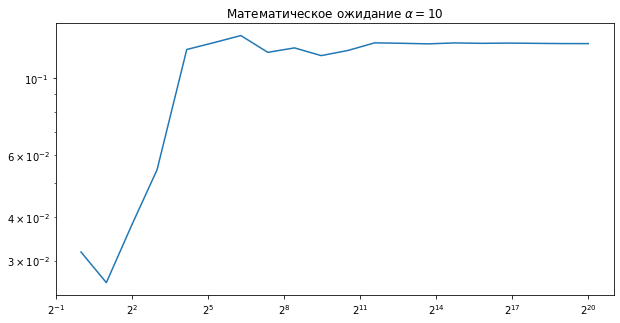

<Figure size 432x288 with 0 Axes>

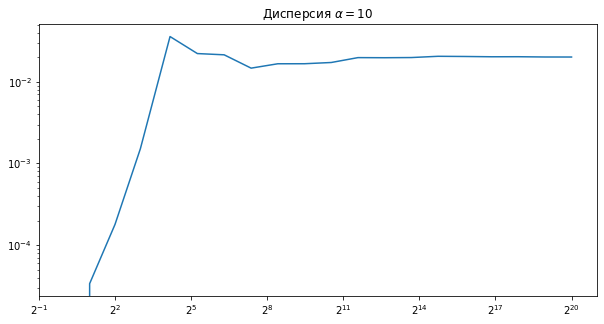

<Figure size 432x288 with 0 Axes>

In [55]:
R = betaprime.rvs(a=1, b = 9, size=2**20)
def calculate(alpha):
    print('Мат. ожидание аналитическое', 1/(alpha - 2))
    print('Дисперсия аналитическая', (1 - alpha)/((2-alpha)**2*(3-alpha)))
calculate(10)
import pandas as pd
inds = np.logspace(start=0, stop=20, base=2, num=20, dtype=np.int) 
means = [np.mean(R[:i]) for i in inds]
var = [np.var(R[:i]) for i in inds]
df = pd.DataFrame(data=np.array([ means, var]).T, index = inds, columns=['mean','variance'])
print(df)
#print('Математические ожидания',*means, 'Дисперсия', *var, sep = ' \n')
plt.figure(figsize=(10, 5))
plt.loglog(inds, means, basex=2)
plt.title(r'Математическое ожидание $\alpha=10$')
plt.show()
plt.clf()

plt.figure(figsize=(10, 5))
plt.loglog(inds, var, basex=2)
plt.title(r'Дисперсия $\alpha=10$')
plt.show()
plt.clf()

### Вывод
В конечных выборках математическое ожидание и дисперсия не совпадают, однако с увелечением размера выборки наблюдаем сходимость математического ожидания и дисперсии к истинному (аналитическому) значению. 

### Пункт 5

Будем считать среднее значение выборок групп только для $\alpha>2$

#### $\alpha=\dfrac{5}{2}$

Text(0.5, 1.0, 'Histogram of average values 16')

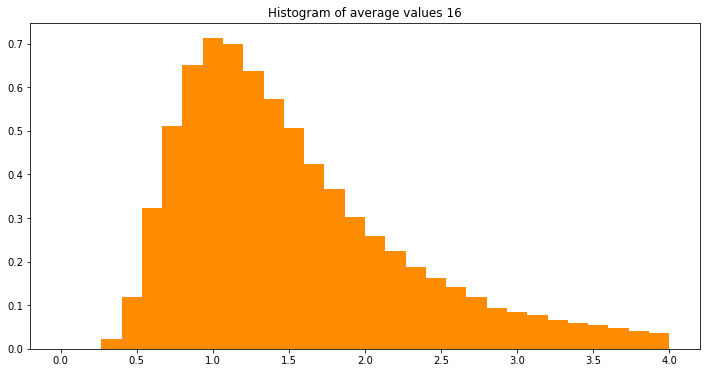

In [102]:
from scipy.stats import norm
R = betaprime.rvs(a=1, b = 1.5, size=2**20)
array_split = np.split(R, 65536)
mean_array = [np.mean(line) for line in array_split]
plt.figure(figsize=(12, 6))

plt.hist(mean_array, density=True, bins=30, color='darkorange', range=(0,4))
plt.title(r'Histogram of average values 16')

Text(0.5, 1.0, 'Histogram of average values 256')

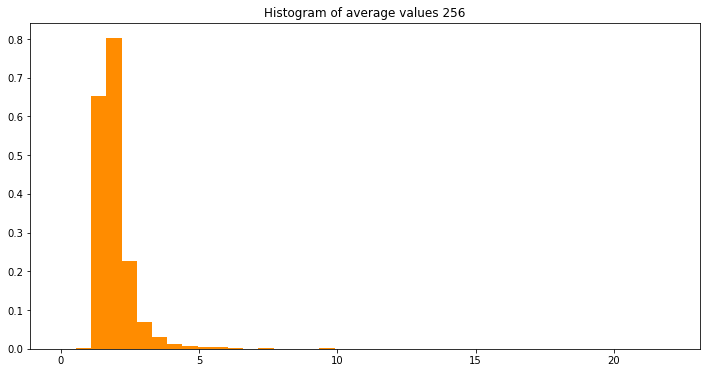

In [68]:
array_split = np.split(R, 4096)
mean_array = [np.mean(line) for line in array_split]
plt.figure(figsize=(12, 6))
plt.hist(mean_array, density=True, bins=40, color='darkorange', range=(0,22));
plt.title(r'Histogram of average values 256')

#### $\alpha=4$

Математическое ожидание a= 0.5020562242746341
Дисперсия D= 0.04718419798444986


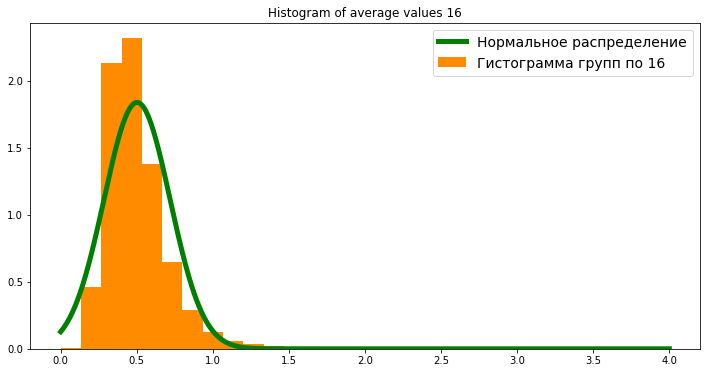

In [124]:
R = betaprime.rvs(a=1, b = 3, size=2**20)
array_split = np.split(R, 65536)
mean_array = [np.mean(line) for line in array_split]
plt.figure(figsize=(12, 6))

x = np.linspace(0, 4, 1000)
plt.plot(x, norm(np.mean(mean_array), np.var(mean_array)**0.5).pdf(x), 
                     color='g',lw=5, label='Нормальное распределение')

plt.hist(mean_array, density=True, bins=30, color='darkorange', range=(0,4),
        label='Гистограмма групп по 16');
plt.title(r'Histogram of average values 16')
plt.legend(fontsize=14, loc=1)

print(r'Математическое ожидание a=', np.mean(mean_array))
print(r'Дисперсия D=' ,np.var(mean_array))

Нормальное распределение с параметрами

$$ f(x) = \dfrac{1}{\sqrt{2 \pi} \cdot 0.21} \exp{\dfrac{-(x-0.5)^2}{2 \cdot 0.047}}$$

Text(0.5, 1.0, 'Histogram of average values 256')

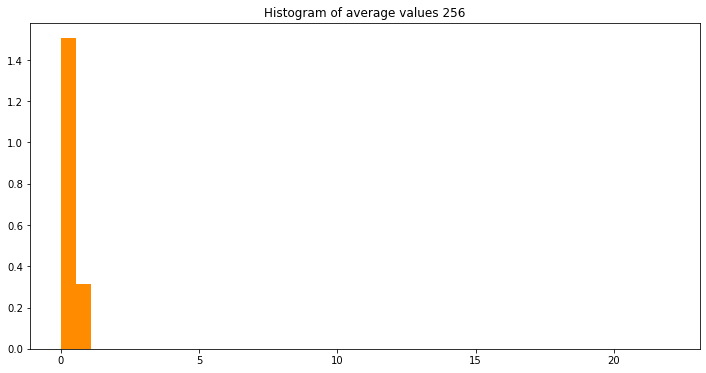

In [125]:
array_split = np.split(R, 4096)
mean_array = [np.mean(line) for line in array_split]
plt.figure(figsize=(12, 6))

plt.hist(mean_array, density=True, bins=40, color='darkorange', range=(0,22));
plt.title(r'Histogram of average values 256')

#### $\alpha=10$

Математическое ожидание a= 0.1248829907654248
Дисперсия D= 0.0012593657551755988


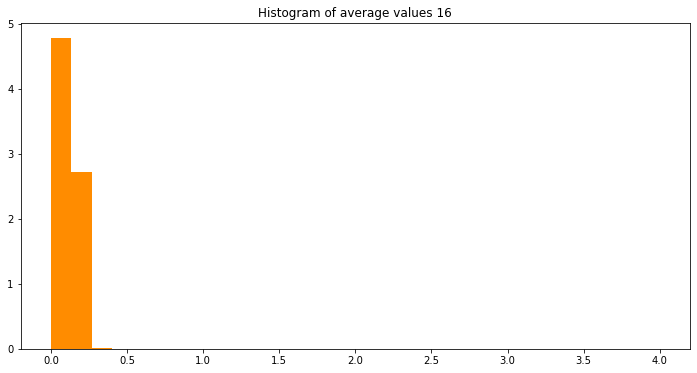

In [117]:
R = betaprime.rvs(a=1, b = 9, size=2**20)
array_split = np.split(R, 65536)
mean_array = [np.mean(line) for line in array_split]
plt.figure(figsize=(12, 6))
plt.hist(mean_array, density=True, bins=30, color='darkorange', range=(0,4));
plt.title(r'Histogram of average values 16')
print(r'Математическое ожидание a=', np.mean(mean_array))
print(r'Дисперсия D=' ,np.var(mean_array))

Text(0.5, 1.0, 'Histogram of average values 256')

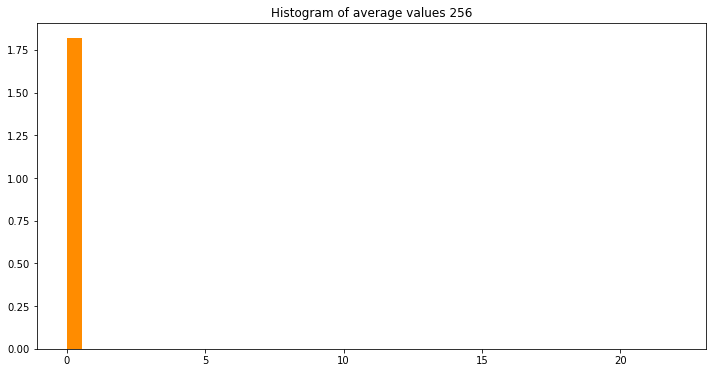

In [116]:
array_split = np.split(R, 4096)
mean_array = [np.mean(line) for line in array_split]
plt.figure(figsize=(12, 6))
plt.hist(mean_array, density=True, bins=40, color='darkorange', range=(0,22));
plt.title(r'Histogram of average values 256')

### Вывод
Чем больше $\alpha$, тем меньше математическое ожидание при конечных выборках отличается от своего истинного значения. 

Из-за своего небольшого количества, группы по 16 значений имееют более разнообразный разброс математических ожиданий, чем группы по 256 значений.

Приблизить гистограмму нормальным распределением получилось при $\alpha=4$ в выборке группы по 16 значений. В остальных случаях нормальное распределение не существовало (из-за отсутствия дисперсии у распределения), либо недостаточно хорошо приближалось к графику.